In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from implicit_trap import trapezoidal
from scipy.integrate import odeint
from jacobian import calc_jac
%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

In [10]:
L_list = np.linspace(0,0.5, 50)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)

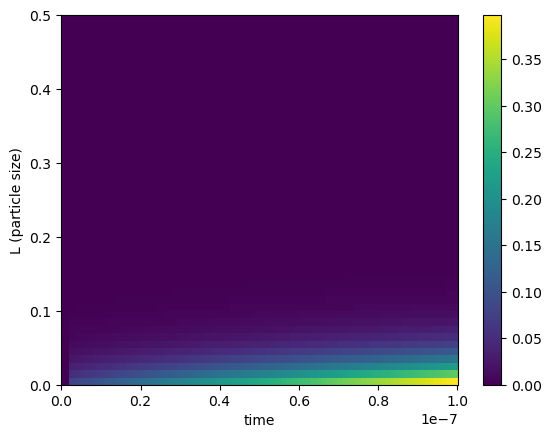

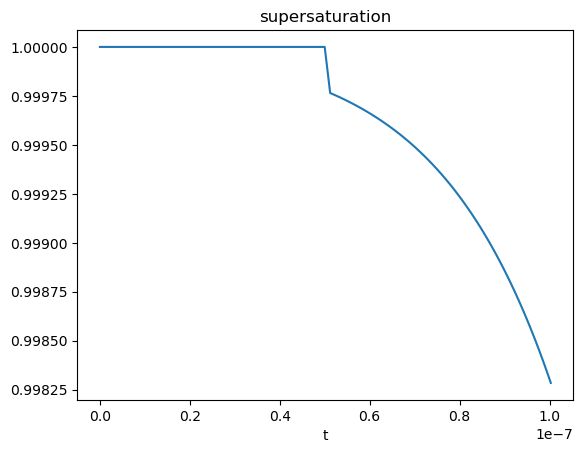

Text(0.5, 0, 't')

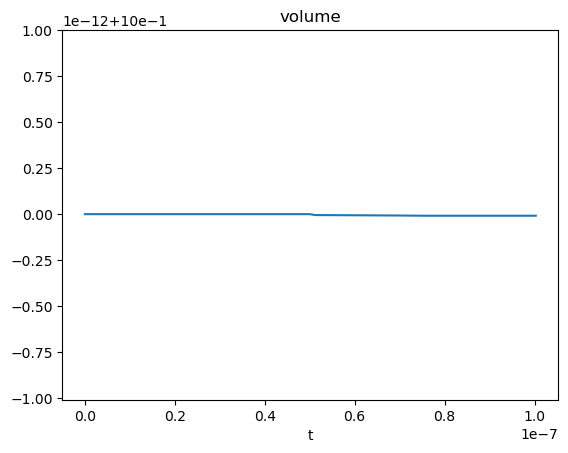

In [11]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

In [13]:
len(tlist)

99

Testing alpha values

In [14]:
t_end = 1e-5
alpha = 1e-1
x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)


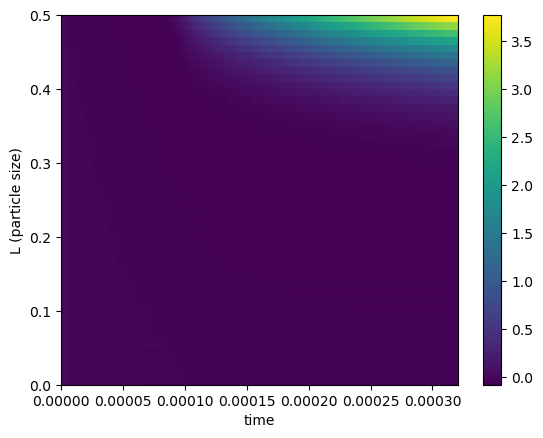

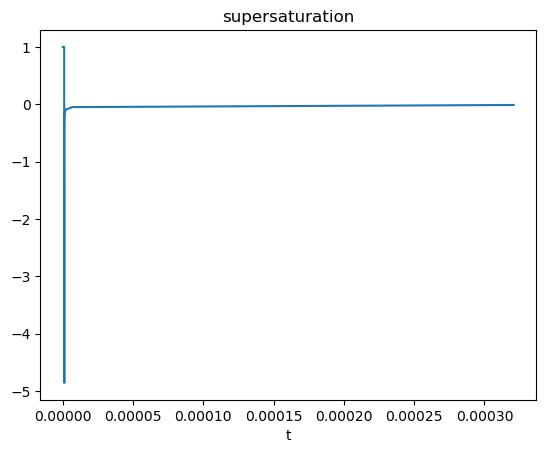

Text(0.5, 0, 't')

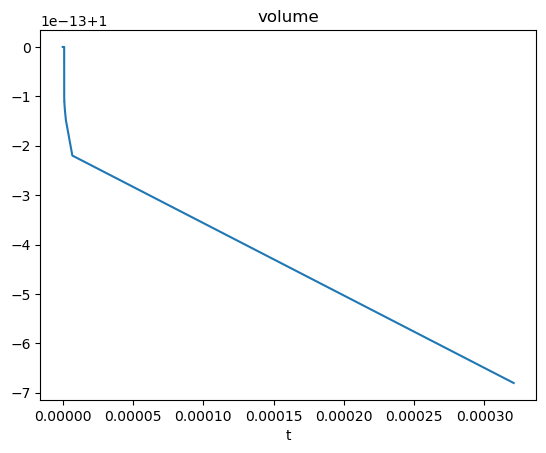

In [15]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')